In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
'''Read Data'''
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
data.shape

(253680, 22)

In [6]:
# check for completeness of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

<AxesSubplot:>

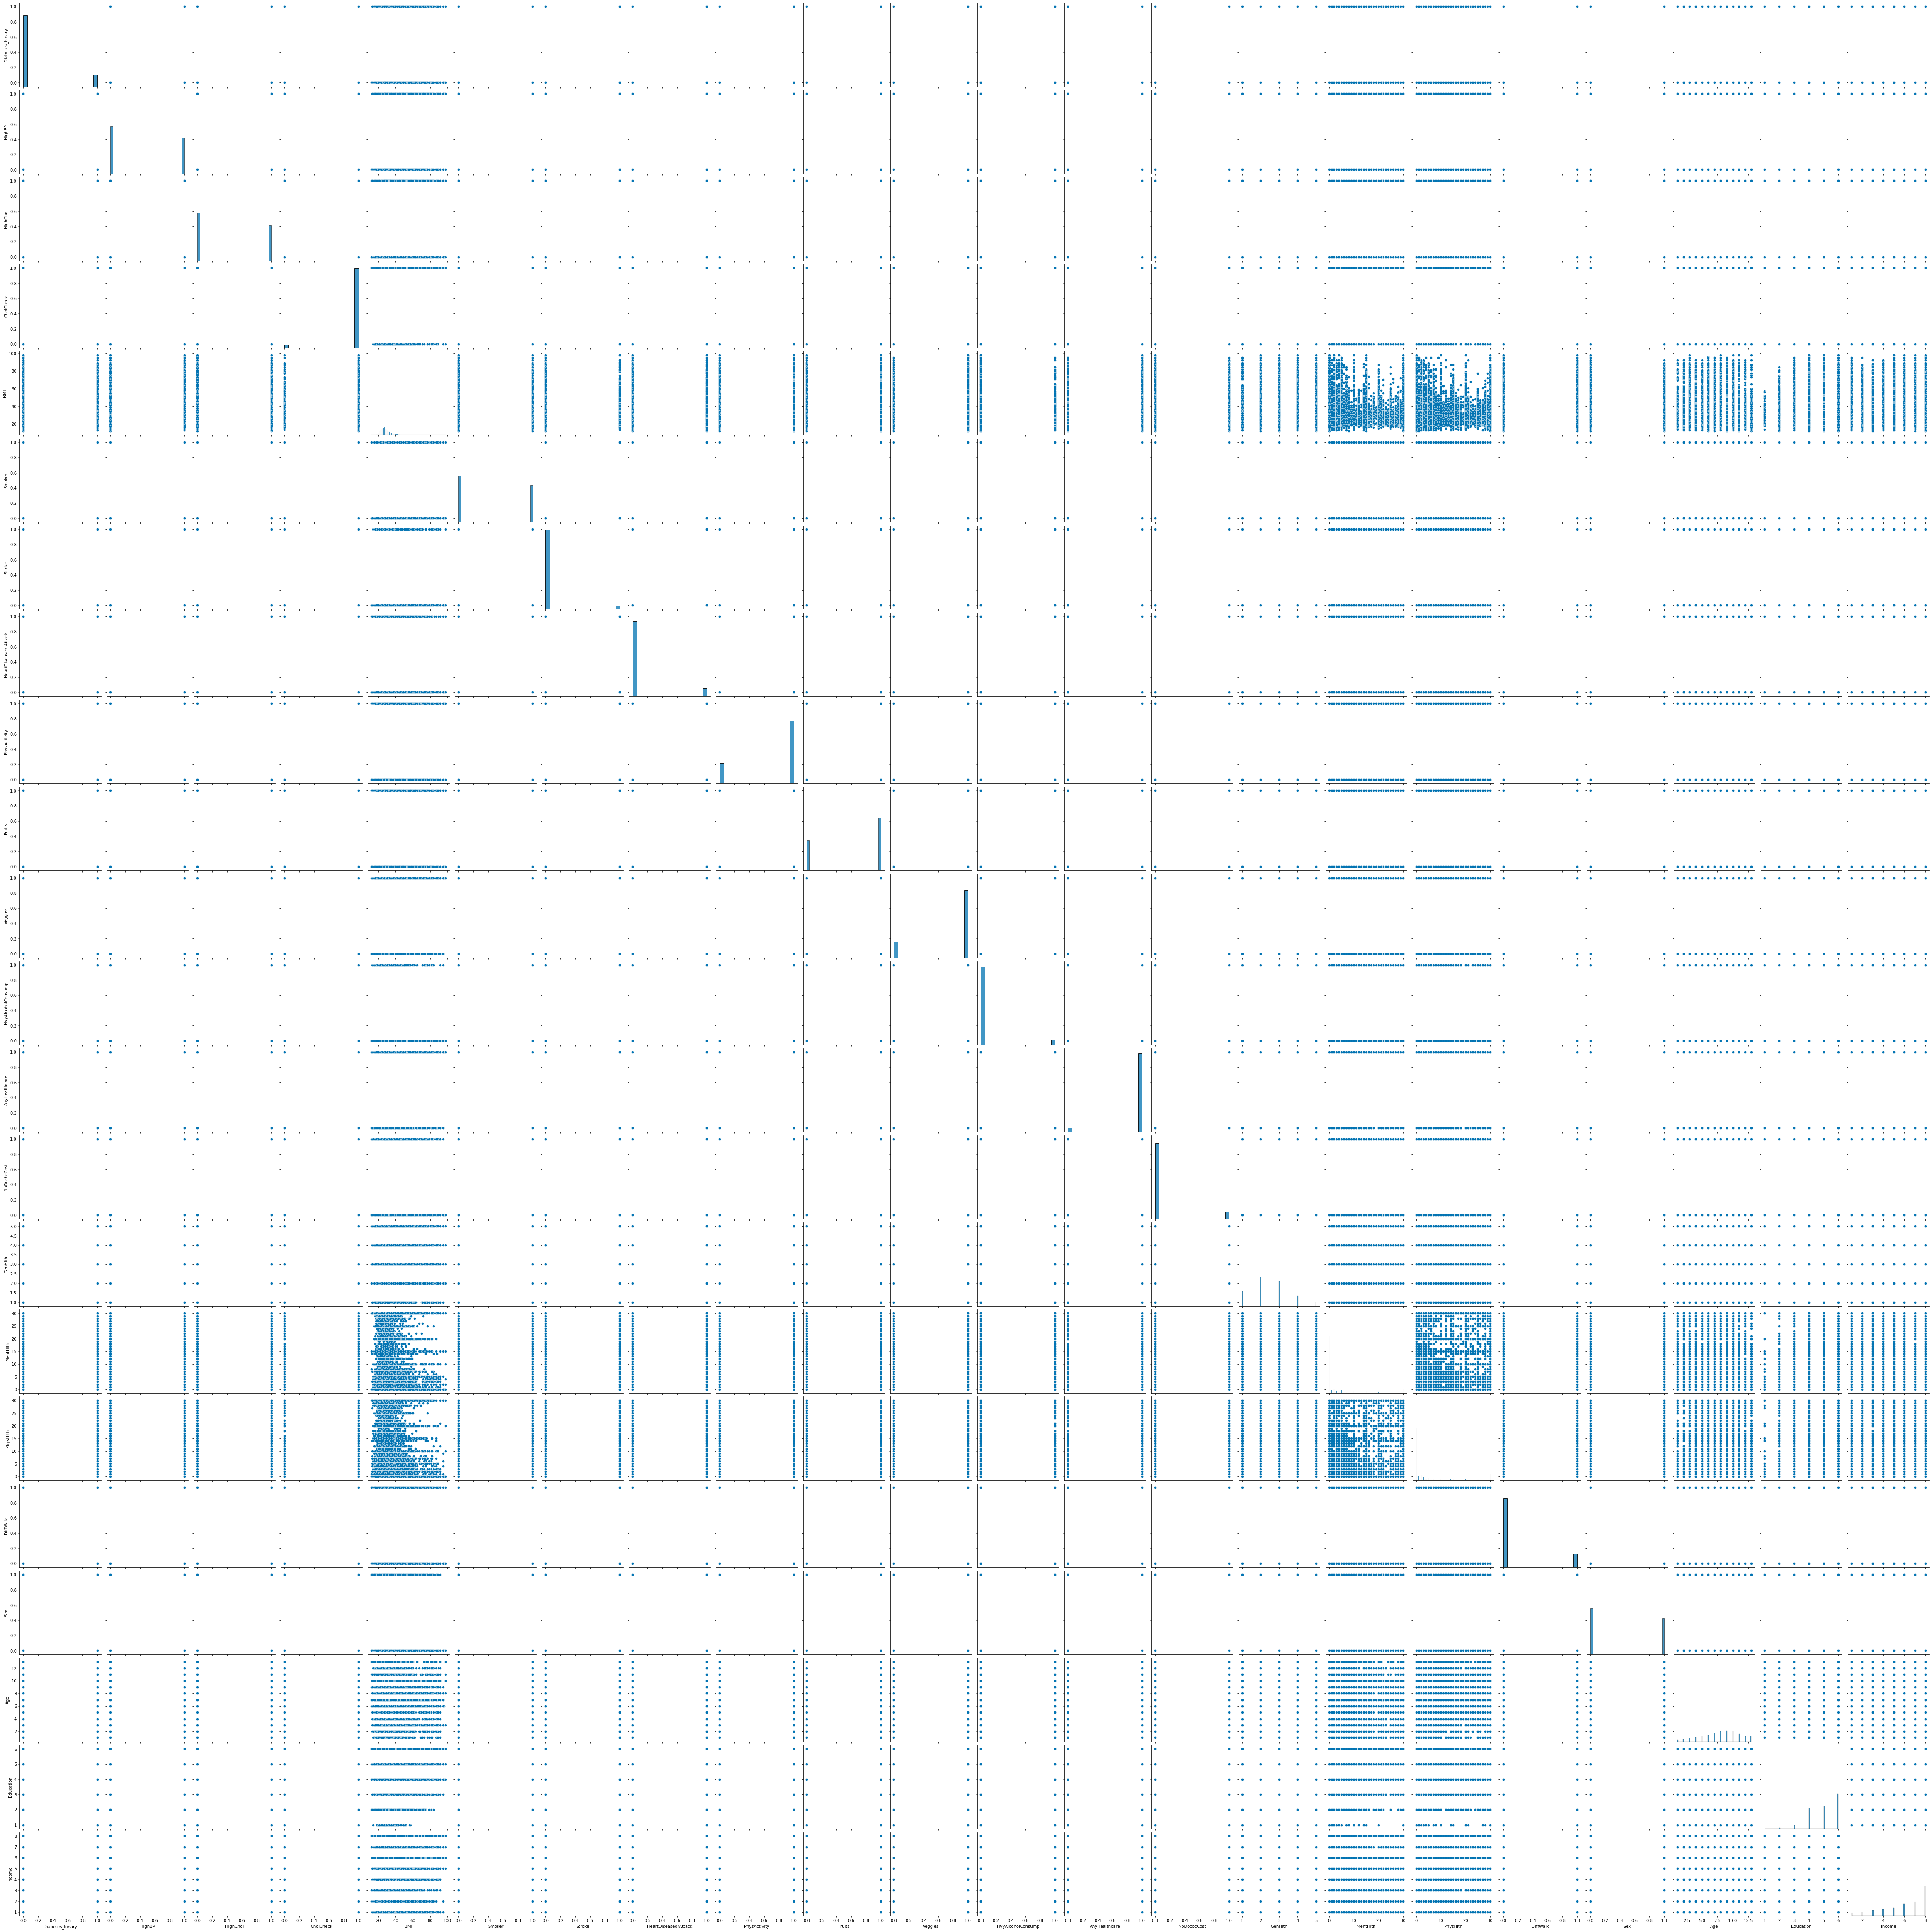

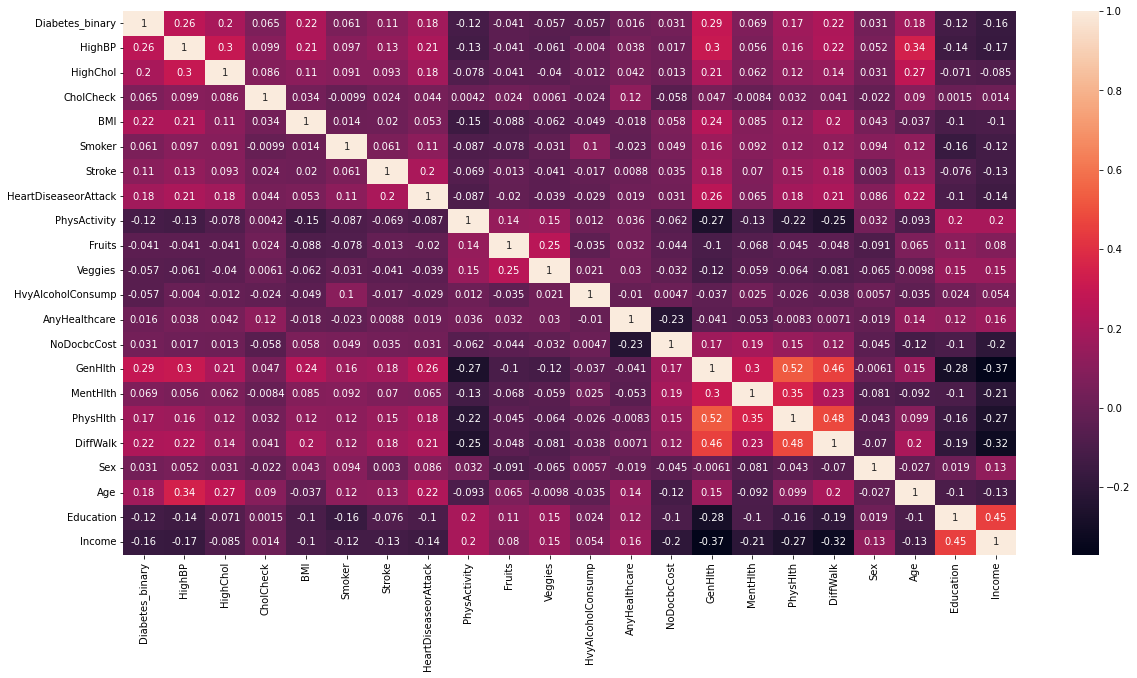

In [7]:
'''Visualizing Dataset'''
import matplotlib.pyplot as plt
import seaborn as sns

# Pair plot 
sns.set_palette('colorblind')
sns.pairplot(data=data, height=3)

# Heat Map - brighter colors indicate more correlation
data.corr()
f, ax = plt.subplots(1, figsize=(20,10))
sns.heatmap(data.corr(), annot=True, ax=ax)

Initial Data Visualization Interpretations from Heatmap

1. HighBP, HighChol, BMI, HeartDiseaseorAttack, GenHlth, and Age all have significant correlation with the outcome variable.

In [9]:
#Splitting Features and Label
y = data.iloc[:,0]
X = data.iloc[:,1:-1]
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0


In [11]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [12]:
%%time
#training and fitting Logistic Regression to model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train,y_train)

# evaluating model
accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")


accuracy =  86.54998423210344 %
CPU times: user 3.93 s, sys: 185 ms, total: 4.11 s
Wall time: 7.17 s


In [13]:
print(model.intercept_)
print(model.coef_)

[-7.85074108]
[[ 0.75997928  0.5692085   1.16485984  0.0603409  -0.00421874  0.14713778
   0.23237188 -0.05032891 -0.04640634 -0.04959191 -0.78127971  0.03124794
   0.03689917  0.54739142 -0.0023934  -0.00719571  0.16470792  0.22320185
   0.12606752 -0.06719776]]


Text(0.5, 0, 'Importance')

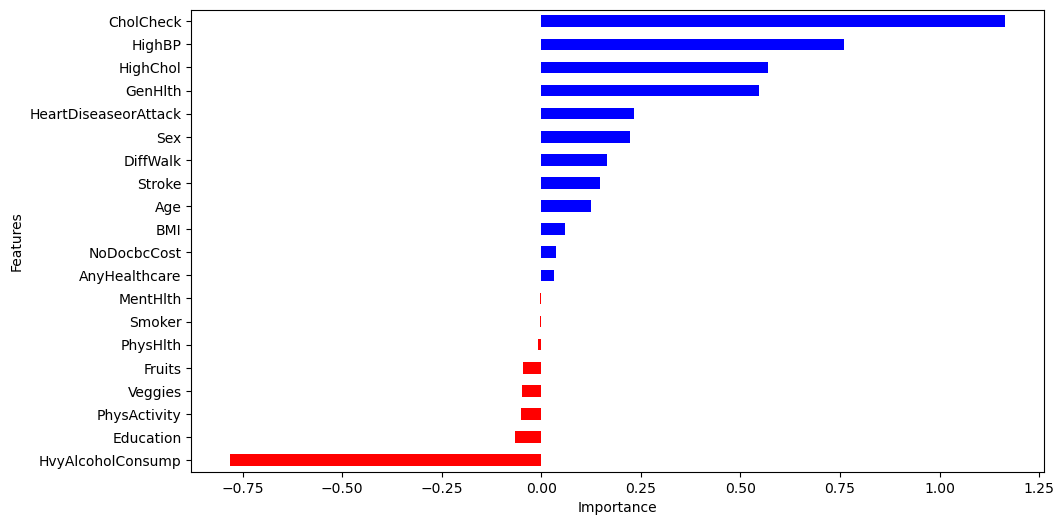

In [14]:
plt.style.use('default')
coeff = list(model.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Interpretations on the Visualization of the Weights :

1. CholCheck, HighBP, GenHlth, and HighChol have significant influence on the model.
2. HvyAlcoholConsumption has negative influence to the model, meaning that a higher HvyAlcoholConsumption correlates to a person not having diabetes
3. Initial data interpretations, like BMI and Age show that they have a high correlation to the outcome variable, but the model relies more on CholCheck, HighBP, GenHlth, and HighChol instead. (? - data needs to be normalized for this to be an accurate statement) 

In [15]:
#making predictions
predictionProbability = model.predict_proba(X_test)
prediction = model.predict(X_test)
#shows probability of being class '0' and class '1'
print('Probability:', predictionProbability)
print('prediction:', prediction)


Probability: [[0.96391643 0.03608357]
 [0.71184509 0.28815491]
 [0.99120649 0.00879351]
 ...
 [0.87313768 0.12686232]
 [0.99236306 0.00763694]
 [0.96145639 0.03854361]]
prediction: [0. 0. 0. ... 0. 0. 0.]


In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[10705   254]
 [ 1452   273]]


Confusion Matrix Interpretations

- True positive is 10653.
- True negative is 284.
- False positive is 213.
- False negative is 1524.

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     10959
         1.0       0.52      0.16      0.24      1725

    accuracy                           0.87     12684
   macro avg       0.70      0.57      0.58     12684
weighted avg       0.83      0.87      0.83     12684



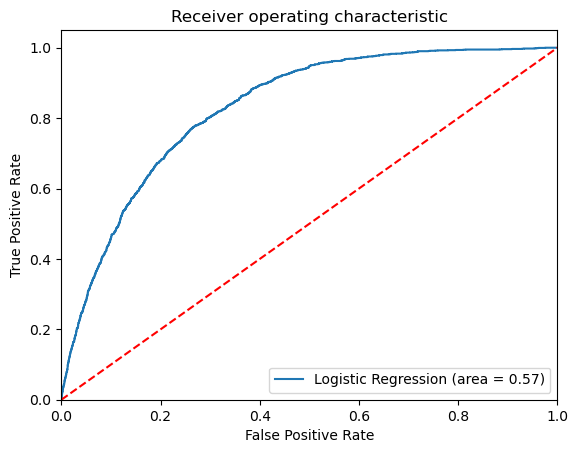

In [19]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

/var/folders/xb/vhz5bjxd7wbg6jqh2txpp0vh0000gn/T/ipykernel_6467/396228862.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


(-10.807175893565395, 47.37963078580336, -23.05454784054076, 69.1751934573033)

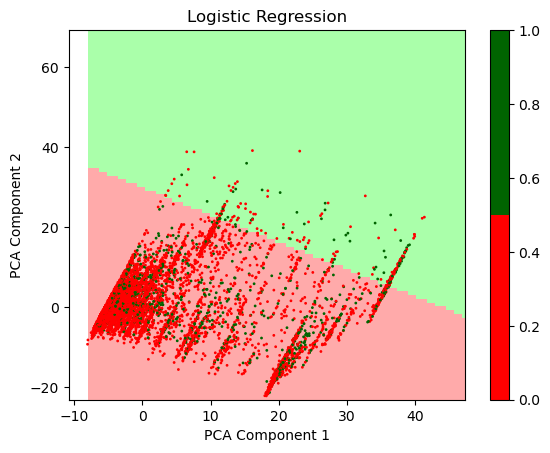

In [33]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#006400'])

# generate dataset
pca = PCA(n_components=2)
pca.fit(X_train)
PCAX = pca.transform(X_train)

# # define bounds of the domain
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(PCAX,y_train)

x_min, x_max = PCAX[:, 0].min() - .1, PCAX[:, 0].max() + .1
y_min, y_max = PCAX[:, 1].min() - .1, PCAX[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pca = PCA(n_components=2)
pca.fit(X_test)
PCAX = pca.transform(X_test)
plt.scatter(PCAX[:, 0], PCAX[:, 1], c=y_test, cmap=cmap_bold, s=1)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Logistic Regression')
plt.colorbar()
plt.axis('tight')

